Chemin eulérien trouvé: [1, 2, 3, 4, 2, 9, 4, 5, 6, 7, 8, 9, 10, 1]


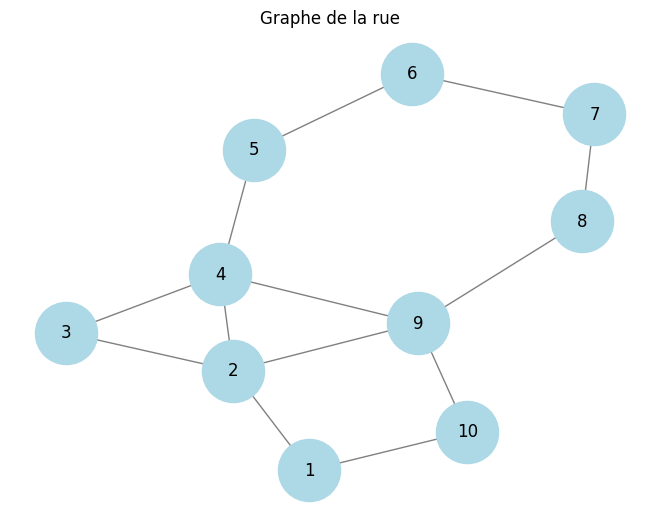

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import random

G = nx.Graph()

# users = []

# randomNumber = random.randint(8, 20)

# friendships = [[] for _ in range(randomNumber)]


# for i in range(randomNumber):
#     users.append(i+1)
#     friendships[i].append(i+1)
#     friendships[i].append(random.randint(8, randomNumber))


users = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
G.add_nodes_from(users)

friendships = [(1, 2), (1, 10), #1
               (2, 1), (2, 9), (2, 3), (2, 4), #2
               (3, 2), (3, 4), #3
               (4, 2), (4, 5), (4, 3), (4, 9), #4 
               (5, 4), (5, 6), #5
               (6, 5), (6, 7), #6
               (7, 6), (7, 8), #7
               (8, 7), (8, 9), #8
               (9, 8), (9, 10), (9, 2), (9, 4), #9
               (10, 9), (10, 1),]

G.add_edges_from(friendships)

def findEulerianPath(G):
    
    graph = nx.to_dict_of_lists(G)

    oddDegreeNodes = [node for node in graph if len(graph[node]) % 2 != 0]
    
    if len(oddDegreeNodes) != 2 and len(oddDegreeNodes) != 0:
        return None
    
    startNode = oddDegreeNodes[0] if oddDegreeNodes else next(iter(graph))
    
    def Hierholzer(u):
        stack = [u]
        path = []
        while stack:
            u = stack[-1]
            if graph[u]:
                v = graph[u].pop()
                graph[v].remove(u)
                stack.append(v)
            else:
                path.append(stack.pop())
        return path
    
    eulerianPath = Hierholzer(startNode)
    
    if any(graph[node] for node in graph):
        return None
    
    return eulerianPath

eulerianPath = findEulerianPath(G)

if eulerianPath:
    print("Chemin eulérien trouvé:", eulerianPath)
else:
    print("Aucun chemin eulérien n'existe dans ce graphe.")


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, edge_color='gray')
plt.title("Graphe de la rue")
plt.show()
